In [53]:
#Olorunfemi Adeyemo Assignment

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [22]:
df=pd.read_csv('/content/spotify.csv')

In [23]:
df

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


In [25]:
#To check if there is a missing value in the dataset
missing_values = df.isnull().sum()

In [26]:
missing_values

,0
Artist,0
Track Name,0
Popularity,0
Duration (ms),0
Track ID,0


In [10]:
#To see number of duplicate rows
duplicate_rows =df.duplicated().sum()

In [9]:
duplicate_rows

27

In [19]:
#To drop duplicate roles
df.drop_duplicates(inplace=True)

*What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.*

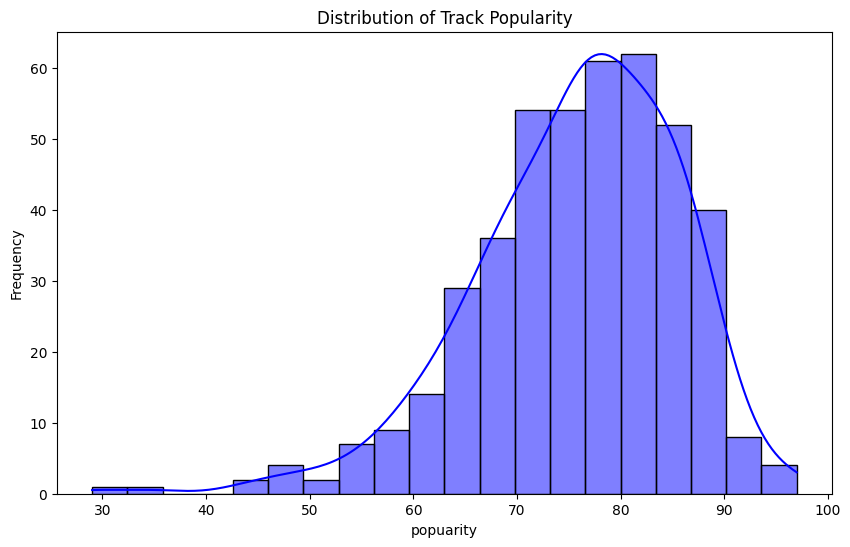

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Popularity'], bins=20, color ='b', kde=True)
plt.title('Distribution of Track Popularity')
plt.xlabel('popuarity')
plt.ylabel('Frequency')
plt.show()

*3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.*

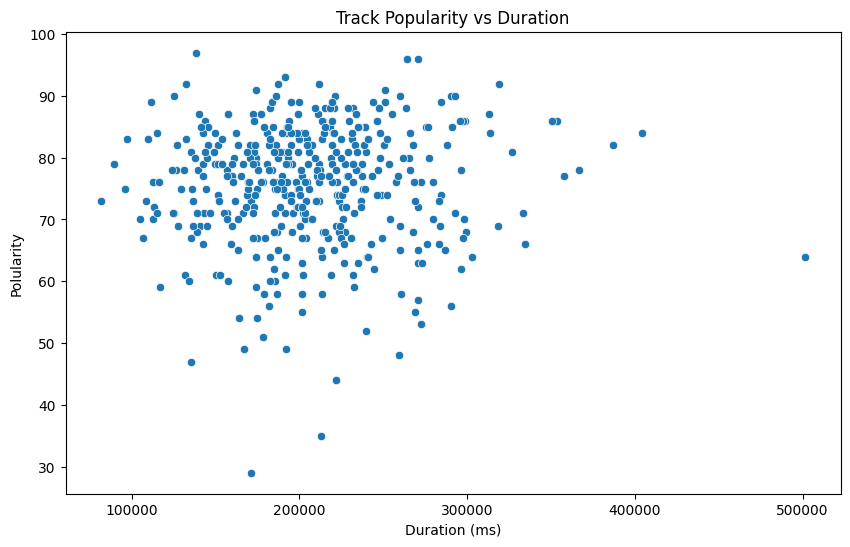

In [37]:
plt.figure(figsize=(10,4))
sns.scatterplot(df, x='Duration (ms)', y = 'Popularity')
plt.title('Track Popularity vs Duration')
plt.xlabel('Duration (ms)')
plt.ylabel('Polularity')
plt.show()

*4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.*

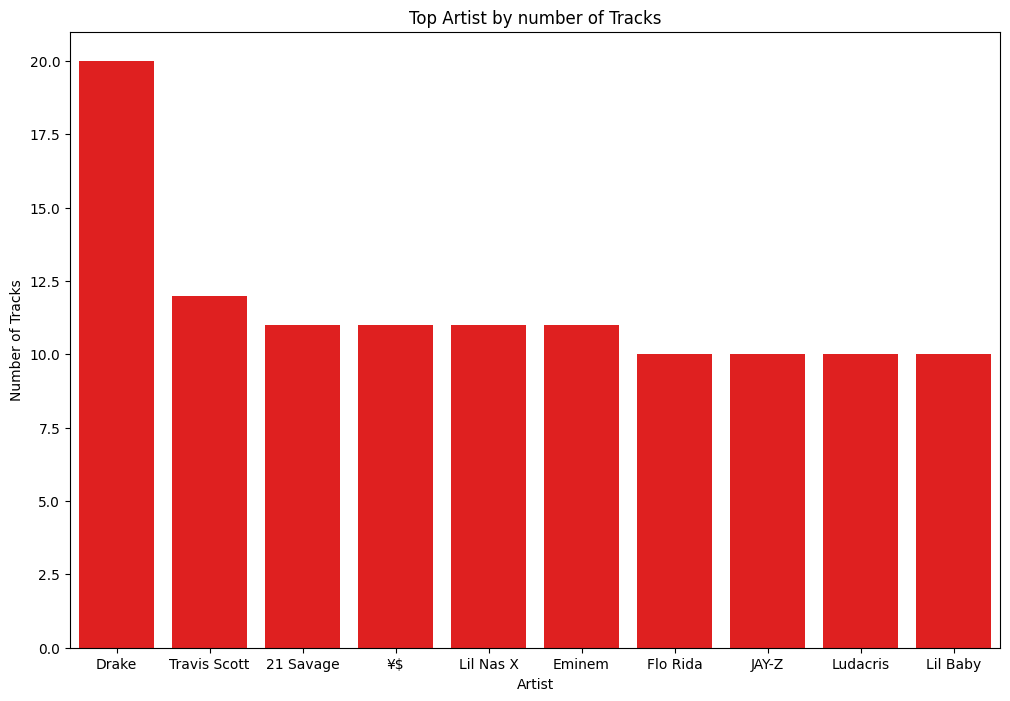

In [45]:
plt.figure(figsize=(12,8))
sns.countplot(df, x='Artist', color='r', order=df['Artist'].value_counts().index[:10])
plt.title('Top Artist by number of Tracks')
plt.ylabel('Number of Tracks')
plt.xlabel('Artist')
plt.show()

*5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.*

In [46]:
least_popular_tracks = df.nsmallest(5, 'Popularity')[['Artist', 'Track Name', 'Popularity']]
print(least_popular_tracks)


             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
435  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47


*6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.*

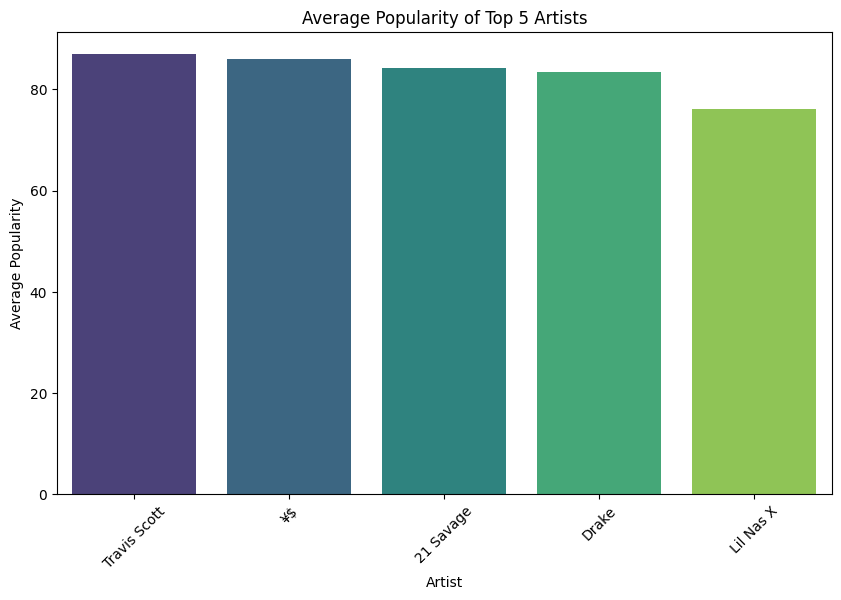

In [48]:
# First, identify the top 5 most frequent artists
top_artists = df['Artist'].value_counts().nlargest(5).index

# Calculate the average popularity for these top 5 artists
top_artists_avg_popularity = df[df['Artist'].isin(top_artists)].groupby('Artist')['Popularity'].mean().sort_values(ascending=False)

# Visualize the average popularity using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists_avg_popularity.index, y=top_artists_avg_popularity.values, palette="viridis")
plt.title("Average Popularity of Top 5 Artists")
plt.xlabel("Artist")
plt.ylabel("Average Popularity")
plt.xticks(rotation=45)
plt.show()


*7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.*

In [49]:
top_tracks_per_artist = df[df['Artist'].isin(top_artists)].sort_values('Popularity', ascending=False).drop_duplicates('Artist', keep='first')[['Artist', 'Track Name', 'Popularity']]
print(top_tracks_per_artist)


           Artist                               Track Name  Popularity
260            ¥$                                 CARNIVAL          96
70      21 Savage                                   redrum          96
282  Travis Scott               FE!N (feat. Playboi Carti)          93
0           Drake  Rich Baby Daddy (feat. Sexyy Red & SZA)          92
312     Lil Nas X                        THATS WHAT I WANT          81


*8.Visualize relationships between multiple numerical variables simultaneously using a pair plot.*

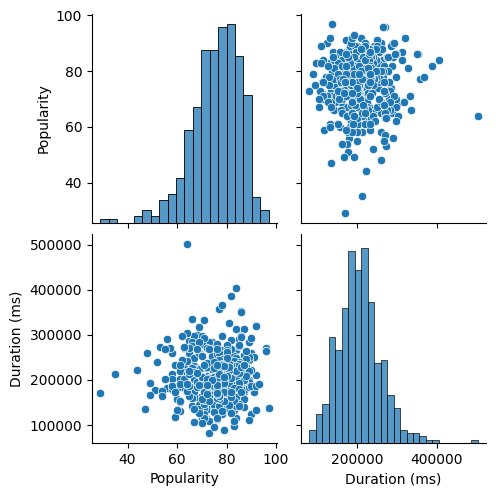

In [50]:
sns.pairplot(df[['Popularity', 'Duration (ms)']])
plt.show()


*9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.*

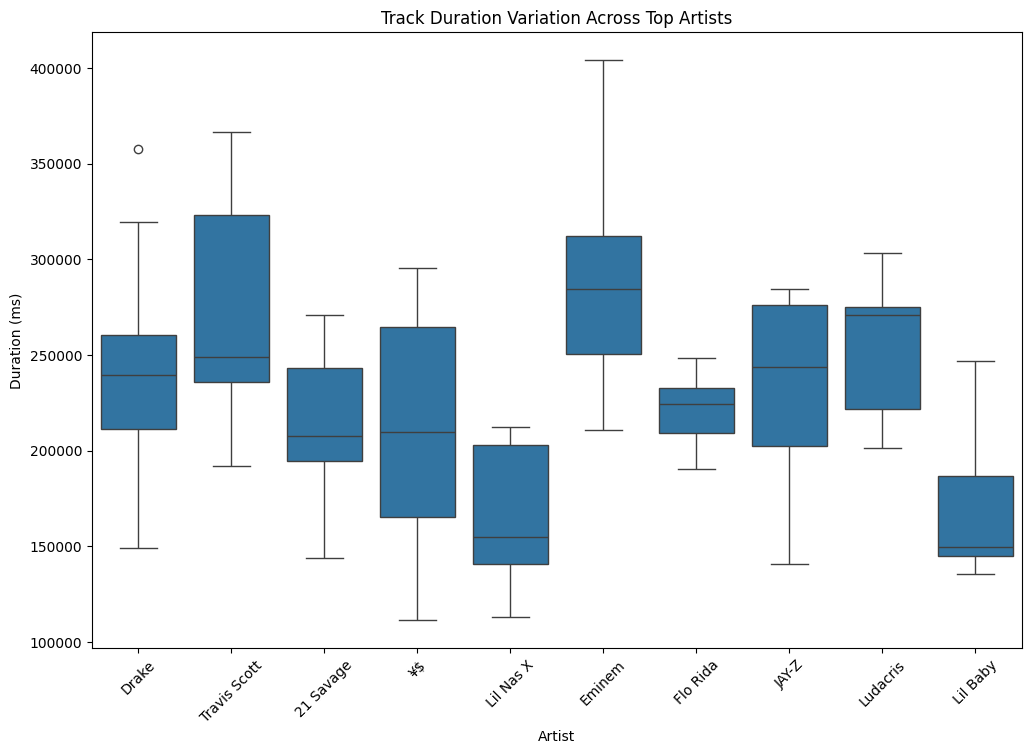

In [51]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Artist', y='Duration (ms)', order=df['Artist'].value_counts().index[:10])
plt.title("Track Duration Variation Across Top Artists")
plt.xlabel("Artist")
plt.ylabel("Duration (ms)")
plt.xticks(rotation=45)
plt.show()


*10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.*

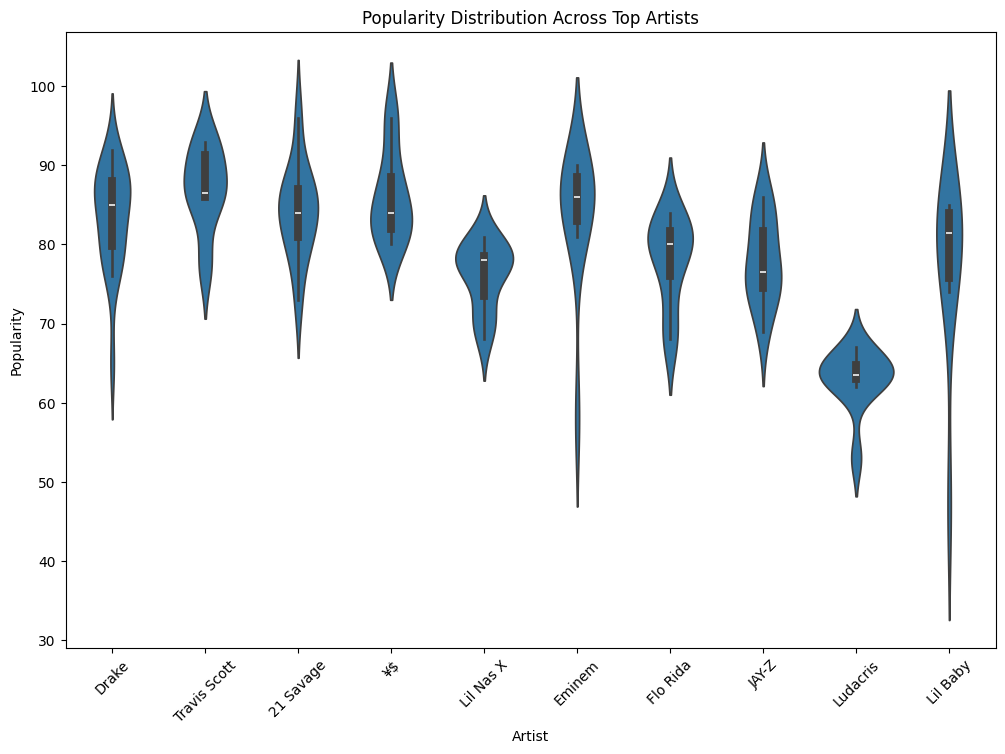

In [52]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=df, x='Artist', y='Popularity', order=df['Artist'].value_counts().index[:10])
plt.title("Popularity Distribution Across Top Artists")
plt.xlabel("Artist")
plt.ylabel("Popularity")
plt.xticks(rotation=45)
plt.show()
